# Past-season Average ensembles

Calculate averaged and denoised series for multiple years of data.

**Contents:**

## R(t) average ensemble
## Tg(t) average series
## Tg(t) denoise series

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import time
import os

from collections import OrderedDict

import rtrend_tools.data_io as dio
import rtrend_tools.interpolate as interp
import rtrend_tools.preprocessing as preproc
import rtrend_tools.rt_estimation as mcmcrt
import rtrend_tools.visualization as vis
import rtrend_tools.utils as utils

%matplotlib notebook

# ----------
def _weighted_avg_rt(arrays, weights):
#     num = np.average(np.array([a for a in year_arrays[1:]]), axis=0)
    
    den = np.fromiter((np.average(w) for w in weights), dtype=float)
    print(den)
    return 

# R(t) average ensemble

This scripts requires a pre-calculated MCMC sample

In [2]:
# ------------------------
# INPUTS AND PARAMETERS
# ------------------------

# General parameters
weight_by_data = False
exclude_first_days = 10

filter_cutoff = 0.15  # Requires an MCMC file with this value
species = "Ae_aegypti"

# --------


# ------------------------------------------------------------------------
# Traditional 2-section

# # -()- LOS ANGELES - 1st section
# loc_dir = "Los_Angeles"
# include_years = [2018, 2019]
# mosq_fname = "mosquito_data/preprocessed/losangeles/Ae_aegypti_tgc0p100_2017-to-2021_ctc0p15.csv"
# mcmc_out_path = "mcmc_outputs/Los_Angeles/Ae_aegypti_tgc0p100_2017-to-2021_ctc0p15_Ae_aegypti_rt.out"

# # -()- LOS ANGELES - 2nd section
# loc_dir = "Los_Angeles"
# include_years = [2020, 2021]
# mosq_fname = "mosquito_data/preprocessed/losangeles/Ae_aegypti_tgc0p100_2017-to-2021_ctc0p15.csv"
# mcmc_out_path = "mcmc_outputs/Los_Angeles/Ae_aegypti_tgc0p100_2017-to-2021_ctc0p15_Ae_aegypti_rt.out"

# ---

# -()- MIAMI - 1st section
loc_dir = "Miami"
include_years = [2019, 2020]  # [2019, 2020]  [2021, 2022]
mosq_fname = "mosquito_data/preprocessed/miami/Ae_aegypti_tgc0p100_2019-to-2022_ctc0p15.csv"
mcmc_out_path = "mcmc_outputs/Miami/Ae_aegypti_tgc0p100_2019-2022_ctc0p15_Ae_aegypti_rt.out"

# # -()- MIAMI - 2nd section
# loc_dir = "Miami"
# include_years = [2021, 2022]  # [2019, 2020]  [2021, 2022]
# mosq_fname = "mosquito_data/preprocessed/miami/Ae_aegypti_tgc0p100_2019-to-2022_ctc0p15.csv"
# mcmc_out_path = "mcmc_outputs/Miami/Ae_aegypti_tgc0p100_2019-2022_ctc0p15_Ae_aegypti_rt.out"

# ---

# # -()- MARICOPA/PHOENIX - 1st section
# loc_dir = "Maricopa"
# include_years = [2014, 2015, 2016, 2017]
# mosq_fname = "mosquito_data/preprocessed/maricopa/Ae_aegypti_tgc0p100_2014-to-2021_ctc0p15.csv"
# mcmc_out_path = "mcmc_outputs/Maricopa/Ae_aegypti_tgc0p100_2014-to-2021_ctc0p15_Ae_aegypti_rt.out"

# # -()- MARICOPA/PHOENIX - 2nd section
# loc_dir = "Maricopa"
# include_years = [2018, 2019, 2020, 2021]
# mosq_fname = "mosquito_data/preprocessed/maricopa/Ae_aegypti_tgc0p100_2014-to-2021_ctc0p15.csv"
# mcmc_out_path = "mcmc_outputs/Maricopa/Ae_aegypti_tgc0p100_2014-to-2021_ctc0p15_Ae_aegypti_rt.out"

# # -()- MARICOPA/PHOENIX - ALTERNATIVE (Excludes 2014)
# loc_dir = "Maricopa"
# include_years = [2015, 2016, 2017]
# mosq_fname = "mosquito_data/preprocessed/maricopa/Ae_aegypti_tgc0p100_2014-to-2021_ctc0p15.csv"
# mcmc_out_path = "mcmc_outputs/Maricopa/Ae_aegypti_tgc0p100_2014-to-2021_ctc0p15_Ae_aegypti_rt.out"


# ----- Create output file name
years_str = "".join((f"{year}-" for year in include_years))[:-1]
out_fname = f"mcmc_outputs/{loc_dir}/avg_ensemble_{species}_years{years_str}" + \
            f"_cutoff{filter_cutoff:0.3f}".replace(".", "p") + ".out"


# --------------------
# IMPORTS THE REFERENCE MOSQUITO PREPROCESSED DATA
# --------------------
mosq_sr = pd.read_csv(mosq_fname, index_col=0, parse_dates=[0])["mosq_preproc"]
mosq_sr

date
2018-12-16    48
2018-12-17    48
2018-12-18    48
2018-12-19    48
2018-12-20    48
              ..
2022-12-20    91
2022-12-21    91
2022-12-22    91
2022-12-23    91
2022-12-24    91
Name: mosq_preproc, Length: 1470, dtype: int64

In [3]:
# --------------------
# IMPORTS THE MCMC DATA
# --------------------
print("Importing MCMC file...")
rtm = mcmcrt.McmcRtEnsemble(np.loadtxt(mcmc_out_path), rolling_width=7, quantile_q=0.025)

num_days = rtm.days
# date_index = pd.date_range(day_0, day_0 + pd.Timedelta(num_days - 1, "d"), freq="1d")  # Old way: first day
date_index = mosq_sr.index
year_0 = include_years[0]


# # Label MCMC columns by date
rtm.df.columns = date_index  # Signature: a[i_sample, date]
rtm.df

Importing MCMC file...


date,2018-12-16,2018-12-17,2018-12-18,2018-12-19,2018-12-20,2018-12-21,2018-12-22,2018-12-23,2018-12-24,2018-12-25,...,2022-12-15,2022-12-16,2022-12-17,2022-12-18,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,2022-12-24
0,0.0,0.956299,1.074166,1.416444,1.396359,1.956747,0.971697,0.758938,1.089728,0.447368,...,0.547516,0.944946,0.938304,1.598445,0.891312,0.517810,0.564959,0.867425,0.849262,0.560324
1,0.0,0.884251,1.122306,0.764288,1.294528,1.956747,0.971697,1.418396,1.166753,0.805543,...,0.735100,0.876459,1.204585,1.148849,1.674646,0.710280,0.700654,0.911571,0.789214,0.657786
2,0.0,0.885991,1.003801,0.493426,1.186995,1.624816,1.130579,0.934892,1.349494,0.899633,...,0.735100,0.766662,1.510727,1.276269,1.925707,0.397065,0.926845,0.874337,0.789214,0.698881
3,0.0,0.780038,1.182184,0.723201,1.186995,1.654798,1.231781,1.081381,1.475227,0.930681,...,0.735100,0.766662,1.483791,1.027465,1.925707,0.606999,0.797072,0.874337,0.428762,0.907967
4,0.0,0.879571,1.319292,0.376091,1.360212,1.679088,0.952737,1.187557,1.581884,0.868144,...,0.543780,0.766662,1.601067,0.786861,1.738023,0.606999,0.738099,0.691940,0.428762,0.358673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.0,1.969892,1.329099,0.781327,1.122038,2.313609,1.715161,1.738609,1.395265,0.493320,...,0.972281,0.934916,0.944296,0.760533,1.159654,0.811643,0.995346,1.285294,1.353515,1.156688
9996,0.0,1.969892,1.534560,0.781327,1.122038,2.307191,1.564802,1.606963,1.483897,0.569799,...,0.418338,0.926366,1.110999,0.563112,1.085002,0.709109,0.995346,1.285294,1.033716,0.883393
9997,0.0,2.091724,1.525670,0.613532,1.305606,2.284291,1.072038,1.220159,1.142399,0.374532,...,0.613979,0.837495,1.110999,1.016816,1.120811,0.549342,0.816099,1.285294,0.665324,0.883393
9998,0.0,2.091724,1.172925,0.828127,1.407916,2.284291,1.196791,1.616280,0.921402,0.572345,...,0.834331,1.231820,1.203446,1.016816,1.297408,0.549342,0.821141,1.199758,0.735219,0.883393


<IPython.core.display.Javascript object>


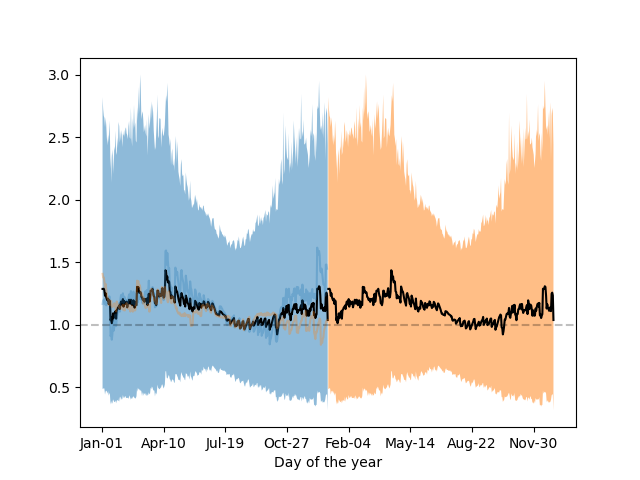

DOY,1,2,3,4,5,6,7,8,9,10,...,357,358,359,360,361,362,363,364,365,366
0,0.137920,0.125359,0.145317,0.211901,0.128709,0.158754,0.175513,0.139603,0.158794,0.145633,...,0.117817,0.073712,0.112361,0.093428,0.080157,0.126191,0.097443,0.120973,0.125513,0.068782
1,0.148558,0.142891,0.169023,0.225748,0.142966,0.158754,0.201868,0.176546,0.158794,0.148527,...,0.125377,0.079313,0.136589,0.096164,0.106727,0.128513,0.148002,0.158080,0.140838,0.090839
2,0.179076,0.142891,0.181925,0.231175,0.165113,0.188349,0.218083,0.203929,0.167248,0.155888,...,0.159845,0.100402,0.166519,0.099819,0.118781,0.135857,0.154892,0.160874,0.146315,0.090839
3,0.185766,0.169191,0.201067,0.238212,0.166928,0.188349,0.227602,0.208944,0.173540,0.176406,...,0.172587,0.106146,0.172271,0.123200,0.131879,0.137192,0.170604,0.167720,0.148834,0.095233
4,0.194012,0.199109,0.206613,0.255582,0.179781,0.191609,0.229298,0.227368,0.211585,0.187404,...,0.174740,0.114496,0.179350,0.124399,0.131879,0.140084,0.189165,0.195433,0.161942,0.099979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,3.977801,4.274818,3.788312,3.541090,3.414441,4.080558,3.917635,3.559161,3.319236,3.546758,...,3.519146,4.628337,3.752697,3.762371,3.824600,3.100164,3.778211,4.191857,3.818487,3.073779
9996,4.049994,4.332411,3.833279,3.649319,3.588500,4.142715,3.957162,3.578749,3.374732,3.593237,...,3.538858,4.682067,3.783501,3.965611,3.859529,3.137570,3.810858,4.263456,3.823837,3.087581
9997,4.055099,4.335881,3.857995,3.717244,3.608030,4.192278,3.971815,3.592506,3.376913,3.609903,...,3.574804,4.710268,3.808005,3.985015,3.931935,3.157040,3.839863,4.270739,3.839451,3.111761
9998,4.066994,4.343350,3.885999,3.740935,3.636471,4.286525,3.988169,3.613748,3.384160,3.649179,...,3.613077,4.751632,3.839739,4.007886,3.958791,3.159962,3.868143,4.330743,3.878185,3.126000


In [8]:
# -------------------------------------------------------
# Perform average of R(t) data over years -- NEW METHOD that's the way
# -------------------------------------------------------

# --- Sort the samples of each day. Crop first days to avoid transient.
rt_df = pd.DataFrame(rtm.get_sortd(), columns=rtm.df.columns).iloc[:, exclude_first_days:]  # a[date, i_sample]

# --- Select whether weights are used or not and make the weights array
if weight_by_data:  # Use preprocessed mosquito data as weights
    w_sr = mosq_sr.iloc[exclude_first_days:]   # a[date]
else:  # Use ones as weight
    w_sr = pd.Series(np.ones_like(mosq_sr), index=mosq_sr.index).iloc[exclude_first_days:]
    
# --- Filter years that are not required
rt_df = rt_df.loc[:, rt_df.columns.year.isin(include_years)]
w_sr = w_sr.loc[w_sr.index.year.isin(include_years)]

# --- Apply weights. 
wrt_df = rt_df * w_sr  # R(t) multiplied by due weights

# --- Group R(t) and weights data by day of year (DOY)
doy_index = w_sr.index.day_of_year   # Index with all "day-of-year" values, used to groupby
wrt_grouped = wrt_df.T.groupby(doy_index)  # Signature: df.loc[date, i_sample]
w_grouped = w_sr.groupby(doy_index)  # 

# --- Calculate the (un/weighted) average at each day of year
avg_rt_df = wrt_grouped.sum().T / w_grouped.sum()
avg_rt_df.columns.name = "DOY"

avg_rt_df


# -----------------------------------
# -----------------------------------
# CHECK RESULTS
# -----------------------------------


fig, ax = plt.subplots()

# --- Plot average ensemble
for n0 in [0, 366]:
    x_array = avg_rt_df.columns + n0
    dates_array = pd.Timestamp("2019-12-31")  # TODO THAT 
    ax.plot(x_array, avg_rt_df.median(), color="k")  # Plot median
    ax.fill_between(x_array, avg_rt_df.quantile(0.025), avg_rt_df.quantile(0.975), alpha=0.5)  # Plot quantiles
    
# --- Plot each year (median only)
for yr, df in rt_df.T.groupby(lambda d: d.year):
    ax.plot(df.index.day_of_year, df.median(axis=1), alpha=0.3)
    
# Plot 1 line
ax.set_xlim(*ax.get_xlim())
ax.plot(ax.get_xlim(), [1, 1], "k--", alpha=0.25)  # plot 1-line
    
ax.set_xlabel("Day of the year")

# Display year month instead of index
format_func = lambda lab, x: (pd.Timestamp(f"2020-01-01") + pd.Timedelta(lab % 366, "d")).strftime("%b-%d")
ax.xaxis.set_major_formatter(ticker.FuncFormatter(format_func))

avg_rt_df

In [10]:
do_export = False

# ---
if do_export:
    os.makedirs(os.path.dirname(out_fname), exist_ok=True)  # Make folders if needed
    
    avg_rt_df.to_csv(out_fname, index=False, header=False, sep="\t")
    
    
    print(f"Exported to:\n'{out_fname}'")
else:
    print(f"Output file (not exported):\n{out_fname}")


Exported to:
'mcmc_outputs/Mia-Southbeach/avg_ensemble_Ae_aegypti_years2019-2020_cutoff0p150.out'


# Tg(t) average series of parameters

In [15]:
# --------------------------
# INPUTS AND IMPORTS
# --------------------------

tg_fname, city, species = "tg_data/Miami_Generation_time_parameters.csv", "Miami", "Ae_aegypti"
# tg_fname, city, species = "tg_data/Phoenix_Generation_time_parameters.csv", "Phoenix", "Ae_aegypti"
# tg_fname, city, species = "tg_data/Key_West_Generation_time_parameters.csv", "Key_West", "Ae_aegypti"
# tg_fname, city, species = "tg_data/Los_angeles_Generation_time_parameters.csv", "Los_Angeles", "Ae_aegypti"

include_years = [2020, 2021]  # [2019, 2020]

filter_cutoff = 0.15

# ======================

tg = dio.load_tg_dynamic_data(tg_fname)
tg_df = tg.df


# =======================
# Definitions - Functions that convert between shape/rate and u/v (parameters suitable for past-season avg)
def sr_to_u(s, r):  # From shape/rate to mean
    return s / r

def sr_to_v(s, r):  # From shape/rate to standard deviation
    return np.sqrt(s) / r

def uv_to_s(mu, std):  # From mean/std to shape
    return mu**2 / std**2

def uv_to_r(mu, std):
    return mu / std**2


tg_df

,Shape,Rate
Date,,
2019-01-01,3.270140,0.302389
2019-01-02,2.755286,0.285630
2019-01-03,2.662504,0.258238
2019-01-04,3.124188,0.290979
2019-01-05,4.020424,0.345773
...,...,...
2022-12-27,2.663814,0.285424
2022-12-28,3.838356,0.464838
2022-12-29,3.009333,0.380809


In [16]:
# --------------------
# PROCESSING
# --------------------

# Split years to make average
# ----------------------------

year_dfs = list()  # Arrays of MCMC samples from each year.
leap_yrs = [y for y in include_years if y % 4 == 0]  # List of leap years

num_yrs = len(include_years)
num_leap_yrs = len(leap_yrs)

# Make a list with tg data from selected years
for i_year, year in enumerate(include_years):
    yr_mask = tg_df.index.year == year
    year_dfs.append(tg_df.loc[yr_mask].copy())  # Make a copy to prevent changing original tg_df
    
    if year_dfs[-1].shape[0] == 0:
        raise ValueError(f"Hey, year {year} has no data!")
    

# Individual processing for each year
# -----------------------------------

for i_year, df in enumerate(year_dfs):
    
    # Convert to "day of year" to easily align dates
    df.index = df.index.day_of_year
    
    # Calculate "average-suitable" parameters
    df["u"] = sr_to_u(df["Shape"], df["Rate"])
    df["v"] = sr_to_v(df["Shape"], df["Rate"])
    
    # Filter suitable parameters (BEFORE averaging)
    df["u_filt"] = preproc.apply_lowpass_filter_pdseries(df["u"], cutoff=filter_cutoff, order=2)
    df["v_filt"] = preproc.apply_lowpass_filter_pdseries(df["v"], cutoff=filter_cutoff, order=2)


# Combination: generate the average time series
# ---------------------------------------------


# Simply add until day 365 (included!)
avg_u = sum(df["u_filt"][:365] for df in year_dfs) / num_yrs  # Handmade arith. mean
avg_v = sum(df["v_filt"][:365] for df in year_dfs) / num_yrs  

if num_leap_yrs > 0:  # Leap year addendum: day 366
    avg_u[366] = sum(df["u_filt"][366] for y, df in zip(include_years, year_dfs) if y in leap_yrs ) / num_leap_yrs
    avg_v[366] = sum(df["v_filt"][366] for y, df in zip(include_years, year_dfs) if y in leap_yrs ) / num_leap_yrs
    
# --- Convert from u/v to shape/rate again
avg_tg_df = pd.DataFrame(
    {"Shape": uv_to_s(avg_u, avg_v), "Rate": uv_to_r(avg_u, avg_v)}
)

avg_tg_df.index.name = "doty"
avg_tg_df

,Shape,Rate
doty,,
1,3.484907,0.303431
2,3.575694,0.311019
3,3.709709,0.322633
4,3.873450,0.337746
5,4.032225,0.354205
...,...,...
362,2.880133,0.249191
363,2.805747,0.245107
364,2.734057,0.240876


<IPython.core.display.Javascript object>


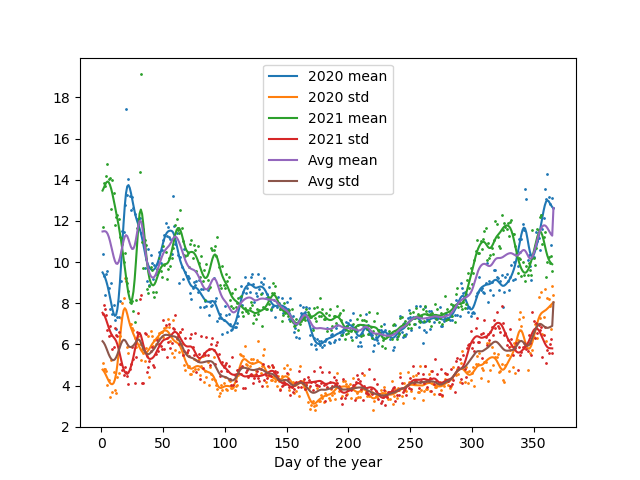

In [20]:
# -------------------
# VISUALIZE AND EXPORT
# --------------------

do_export = False

# File name
years_str = "-".join((f"{year}" for year in include_years))
out_tg_fname = f"tg_data/avg_series/{city}-{species}_years{years_str}" + \
               f"_cutoff{filter_cutoff:0.3f}".replace(".", "p") + ".csv"

# -------------------
# PLOTS

fig, ax = plt.subplots()

for i, (df, yr) in enumerate(zip(year_dfs, include_years)):

    line = ax.plot(df["u_filt"], label=f"{yr} mean")[0]
    ax.plot(df["u"], "o", ms=1, color=line.get_color())

    line = ax.plot(df["v_filt"], label=f"{yr} std")[0]
    ax.plot(df["v"], "o", ms=1, color=line.get_color())

ax.plot(avg_tg_df["Shape"] / avg_tg_df["Rate"], label="Avg mean")
ax.plot(np.sqrt(avg_tg_df["Shape"]) / avg_tg_df["Rate"], label="Avg std")

ax.set_xlabel("Day of the year")
ax.legend()


# ----------------------
# EXPORT DATA TO FILE

if do_export:
    utils.make_dir_from(out_tg_fname)
    avg_tg_df.to_csv(out_tg_fname)
    print(f"Exported to '{out_tg_fname}'")

<IPython.core.display.Javascript object>


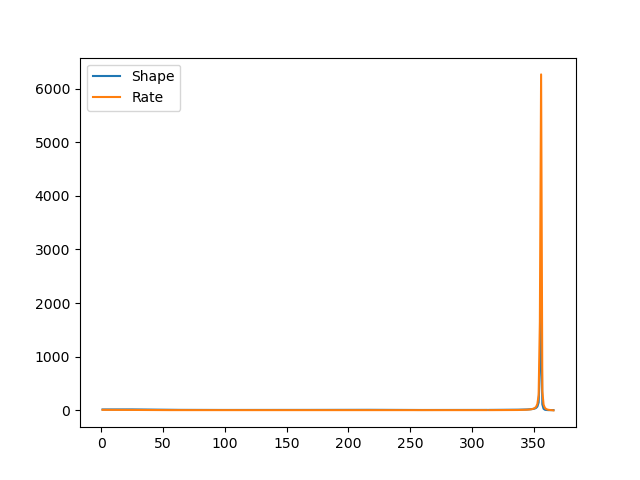

In [8]:
fig, ax = plt.subplots()

ax.plot(avg_tg_df["Shape"], label="Shape")
ax.plot(avg_tg_df["Rate"], label="Rate")

ax.legend()

# Tg: Denoised time series

In [4]:
# ----------------
# INPUTS AND IMPORTS
# ------------------
tg_fname, city, species = "tg_data/Miami_Generation_time_parameters.csv", "Miami", "Ae_aegypti"
# tg_fname, city, species = "tg_data/Phoenix_Generation_time_parameters.csv", "Phoenix", "Ae_aegypti"
# tg_fname, city, species = "tg_data/Brownsville_Generation_time_parameters.csv", "Brownsville", "Ae_aegypti"
# tg_fname, city, species = "tg_data/Key_West_Generation_time_parameters.csv", "Key_West", "Ae_aegypti"
# tg_fname, city, species = "tg_data/Los_angeles_Generation_time_parameters.csv", "Los_Angeles", "Ae_aegypti"

cutoff = 0.99
clamp_tg_min = 2.  # Tg cannot be shorter than this value

# -----------------
# Imports
tg_df = pd.read_csv(tg_fname, index_col=0, parse_dates=[0])


# --------------------
# Definitions 
# Functions that convert between shape/rate and u/v (parameters suitable for past-season avg)
def sr_to_u(s, r):  # From shape/rate to mean
    return s / r

def sr_to_v(s, r):  # From shape/rate to standard deviation
    return np.sqrt(s) / r

def uv_to_s(mu, std):  # From mean/std to shape
    return mu**2 / std**2

def uv_to_r(mu, std):
    return mu / std**2

# --------
tg_df

,Shape,Rate
Date,,
2018-12-01,3.270140,0.302389
2018-12-02,3.270140,0.302389
2018-12-03,3.270140,0.302389
2018-12-04,3.270140,0.302389
2018-12-05,3.270140,0.302389
...,...,...
2022-12-27,2.663814,0.285424
2022-12-28,3.838356,0.464838
2022-12-29,3.009333,0.380809


<IPython.core.display.Javascript object>


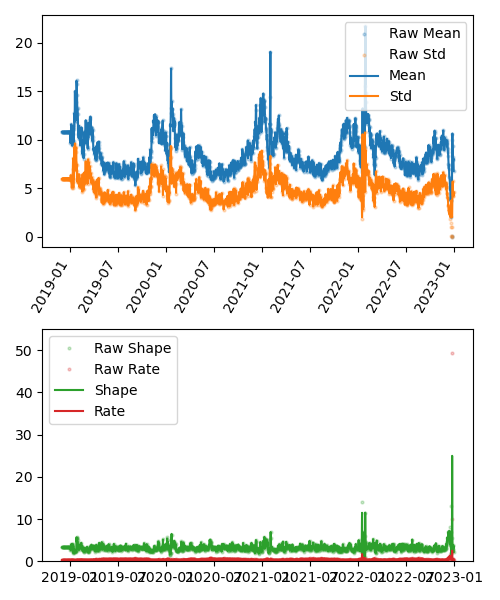

Max shape = 24.9817
Max rate = 2.4991


,Shape,Rate
Date,,
2018-12-01,3.293339,0.304172
2018-12-02,3.246616,0.300581
2018-12-03,3.294396,0.304253
2018-12-04,3.245556,0.300500
2018-12-05,3.295496,0.304337
...,...,...
2022-12-27,2.686350,0.287946
2022-12-28,3.795293,0.459432
2022-12-29,3.040118,0.384868


In [5]:
# ----------------------
# CALCULATIONS
# ----------------------

# Conversion to mean (u) and std (v) space
raw_u = sr_to_u(tg_df["Shape"], tg_df["Rate"])
raw_v = sr_to_v(tg_df["Shape"], tg_df["Rate"])

# Denoising
fil_u = preproc.apply_lowpass_filter_pdseries(raw_u, cutoff=cutoff)
fil_v = preproc.apply_lowpass_filter_pdseries(raw_v, cutoff=cutoff)

# Clamp-regularization
for series in [fil_u, fil_v]:
    mask = series < clamp_tg_min
    series.loc[mask] = clamp_tg_min
    
# Conversion back to shape (s) and rate (r)
fil_df = pd.DataFrame(
    OrderedDict(
        Shape=uv_to_s(fil_u, fil_v),
        Rate= uv_to_r(fil_u, fil_v),
    ))

# -----
# Quick visualization
fig, axes = plt.subplots(nrows=2, figsize=(5, 6))

axes[0].plot(raw_u, "o", label="Raw Mean", ms=2, alpha=0.25)
axes[0].plot(raw_v, "o", label="Raw Std", ms=2, alpha=0.25)
axes[0].plot(fil_u, label="Mean", color="C0")
axes[0].plot(fil_v, label="Std", color="C1")

axes[1].plot(tg_df["Shape"], "o", label="Raw Shape", ms=2, color="C2", alpha=0.25)
axes[1].plot(tg_df["Rate"], "o", label="Raw Rate", ms=2, color="C3", alpha=0.25)
axes[1].plot(fil_df["Shape"], label="Shape", color="C2")
axes[1].plot(fil_df["Rate"], label="Rate", color="C3")


axes[1].set_ylim(0., 55.)
axes[0].legend()
axes[1].legend()

vis.rotate_ax_labels(axes[0])
fig.tight_layout()

# ----
print("Max shape = {:0.4f}".format(fil_df["Shape"].max()))
print("Max rate = {:0.4f}".format(fil_df["Rate"].max()))
fil_df

In [6]:
# --------------------
# EXPORT
# --------------------

do_export = False

# -------
out_tg_fname = f"tg_data/denoised/{city}-{species}_" + \
               f"cutoff{cutoff:0.3f}".replace(".", "p") + ".csv"

print(out_tg_fname)

if do_export:
    utils.make_dir_from(out_tg_fname)
    fil_df.to_csv(out_tg_fname)
    print(f"Exported to '{out_tg_fname}'")

tg_data/denoised/Miami-Ae_aegypti_cutoff0p990.csv
